# Introduction to Probability

In [48]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['figure.dpi'] = 100
from math import factorial as fac
import scipy.special
from scipy.stats import beta
import numpy as np

The probability $P$ of event $X$: $P(X) \in [0,1]$.

The product rule (joint probability of events $X$ and $Y$): $P(X,Y) = P(X) \mathrm{\ AND\ } P(Y) = P(X) \times P(Y) \in [0,1]$.

The negation rule: $P(X) = 1 - \neg P(X)$.

The set of all possible outcomes: $\Omega$. e.g. $\Omega = \{ (heads,heads), (heads,tails), (tails,heads), (tails,tails) \}$.

The odds $O$ of hypothesis $H$ converted to probability: $P(H) = \frac{O(H)}{1 + O(H)}$.

The sum rule: $P(X) \mathrm{\ OR\ } P(Y) = P(X) + P(Y) - P(X,Y) \in [0,1]$. Note, for mutually exclusive events the final term is zero.

### Binomial distribution

$k$: the number of outcomes of interest.

$n$: the number of trials.

$p$: the probability of an outcome of interest.

In general: $B(k;n,p) = N_\mathrm{outcomes} \times P(\mathrm{desired\ outcome})$.

$N_\mathrm{outcomes} = {n \choose k} = \frac{n!}{k! \times (n - k)!}$.

$P(\mathrm{desired\ outcome}) = p^k \times (1 - p)^{n-k}$, where $p$ is the probability of the individual outcome.

Hence, $B(k;n,p) = \frac{n!}{k! \times (n - k)!} \times p^k \times (1 - p)^{n-k}$.

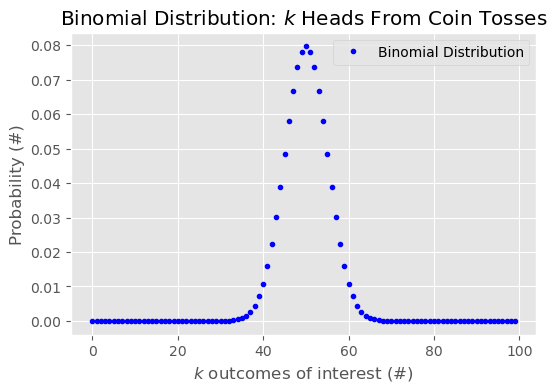

In [40]:
def binomial(k, n, p):
    return scipy.special.factorial(n) / (scipy.special.factorial(k) * scipy.special.factorial(n-k)) * p**k * (1-p)**(n-k)

n = 100
k = np.arange(0,n)
p=0.5

B = binomial(k, n, p)

plt.plot(k, B, 'b.', label='Binomial Distribution')

plt.title('Binomial Distribution: $k$ Heads From Coin Tosses')
plt.xlabel('$k$ outcomes of interest (#)')
plt.ylabel('Probability (#)')
plt.legend()
plt.show()

### Beta distribution

Continuous analogue of the binomial distribution.

$p$: the probability of an event.

$\alpha$: the number of times we observe an event of interest.

$\beta$: the number of times we don't observe an event of interest.

The total number of trials: $\alpha + \beta$.

$\mathrm{Beta}(p;\alpha,\beta) = \frac{p^{\alpha-1} \times (1-p)^{\beta-1}}{\int_0^1 p^{\alpha-1} \times (1-p)^{\beta-1} dp}$

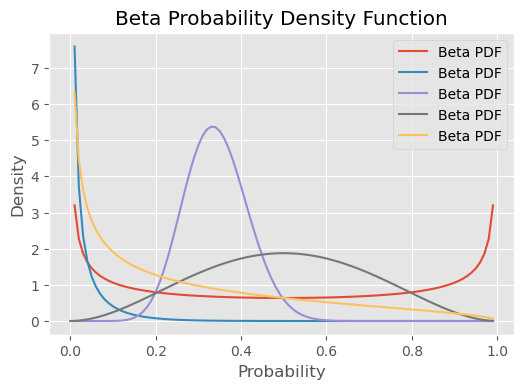

In [51]:
a = [0.5, 0.1, 14, 3, 0.5]
b = [0.5, 10, 27, 3, 1.5]

x = np.arange(0,1,0.01)
for i, val in enumerate(a):
    dist = beta(a[i],b[i])
    plt.plot(x, dist.pdf(x), label='Beta PDF')

plt.title('Beta Probability Density Function')
plt.xlabel('Probability')
plt.ylabel('Density')
plt.legend()
plt.show()

### Beta Cumulative Distribution Function

$CDF = \int_0^1 \frac{p^{\alpha-1} \times (1-p)^{\beta-1}}{\int_0^1 p^{\alpha-1} \times (1-p)^{\beta-1} dp}$

Use the CDF to integrate over different ranges of the PDF to obtain probability of result in certain range.

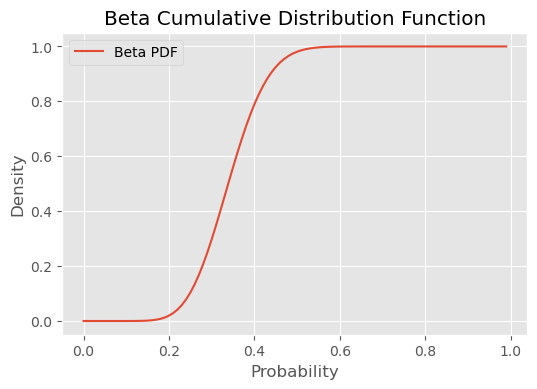

In [53]:
a = 14
b = 27

x = np.arange(0,1,0.01)
dist = beta(a,b)

plt.plot(x, dist.cdf(x), label='Beta PDF')
plt.title('Beta Cumulative Distribution Function')
plt.xlabel('Probability')
plt.ylabel('Density')
plt.legend()
plt.show()